<a href="https://colab.research.google.com/github/johnguevss/IntroToPySpark/blob/main/pyspark_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PySpark Overview

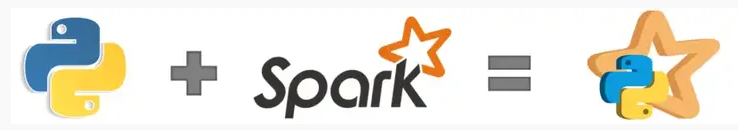

By the end of this session you will know:

*   A brief overview of spark
*   How to initialize spark in python
*   How to import data using pyspark
*   How to transform data using pyspark
*   How to run sql queries programmatically
*   How to output data using pyspark
*   Build a project using pyspark

Not Included
* Installation
* Monitoring

Most of the descriptions here are from:
https://sparkbyexamples.com/

---




## Big Data
Refers to extremely large and complex sets of data that cannot be easily processed, managed, or analyzed using traditional data processing tools or techniques. It typically involves data sets that are too voluminous, diverse, or fast-paced to be effectively handled with conventional methods.



### 3Vs of Big Data
*   Volume: Size of the data
*   Velocity: Different sources and formats
*   Variety: Speed of the data



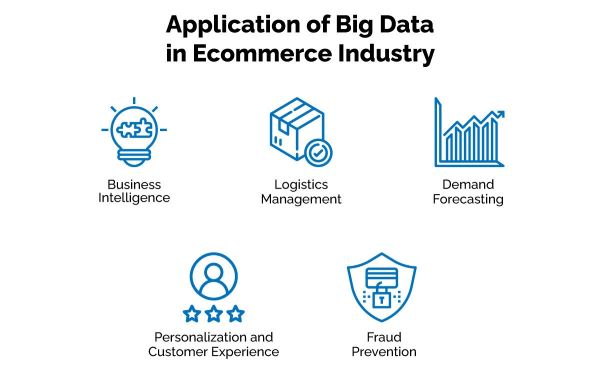

### Big Data Terms
Clustered computing 
- Collection of resources of multiple machines

Parallel computing 
- Simultaneous execution by multiple processing units, such as CPUs or cores within a single computer.

Distributed computing
- Distributing the task across multiple interconnected systems or nodes

Batch Processing
- Dividing the job into small pieces and running on individual machines in a given interval

Real-time processing
- Immediate processing of data

---


## Apache Spark
- Open-source distributed computing framework designed for big data processing and analytics.


1. Speed and In-Memory Processing
2. Resilient Distributed Datasets (RDDs)
3. Data Processing APIs
4. Spark SQL
5. Spark Streaming
6. Machine Learning (Spark MLlib)
7. Graph Processing (GraphX)

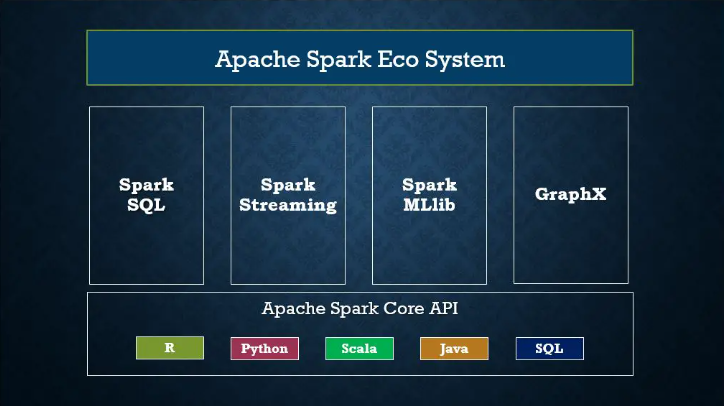


* Local Mode - Single Machine Setup
* Cluster Mode - Set of predefined machines

---



## PySpark
- Basically is a Python API for Apache Spark
- a Spark library that allows us to run Python codes that uses Apache Spark capabilities


### Advantages of PySpark
- Efficiently processes data using in-memory distributed processing
- Very fast data processing
- Can process data from hadoop HDFS, AWS S3, databases, and a lot of file formats
- Can be used for real-time data processing

In [1]:
!pip install spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58747 sha256=b318f101dabd7f08884f4784536a6ae989d0ea2b40f7b62fcd53599e1e27b3d1
  Stored in directory: /root/.cache/pip/wheels/63/88/77/b4131110ea4094540f7b47c6d62a649807d7e94800da5eab0b
Successfully built spark


In [2]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=6df5e7dadffca2b5b86cbf47c9dde359931bb32b6799a50d1a7a4ee1959e3ca6
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [3]:
import spark
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.builder \
    .appName("MySparkApp") \
    .master("local[*]") \
    .getOrCreate()

## SparkSessions
* An entrypoint into the spark cluster

**master()** – If you are running it on the cluster you need to use your master name as an argument to master(). usually, it would be either yarn or mesos depends on your cluster setup.

* Use local[x] when running in Standalone mode. x should be an integer value and should be greater than 0; this represents how many partitions it should create when using RDD, DataFrame, and Dataset. Ideally, x value should be the number of CPU cores you have.

**appName()** – Used to set your application name.

**getOrCreate()** – This returns a SparkSession object if already exists, and creates a new one if not exist.

## RDD (Resilient Distributed Datasets)
* Resilient - Ability to withstand failures
* Distributed - Spanning across multiple machines
* Datasets - Collection of partitioned data (Arrays, Tables, Tuples etc)
* Best used on unstructured datasets

### Creating an RDD

parallelize(data)

In [47]:
# Create an RDD using parallelize method
data = [1, 2, 3, 4, 5]
rdd = spark.sparkContext.parallelize(data)

# Collect and display the items in the RDD
# Note using print directly will only show information about the rdd
items = rdd.collect()
print(items)

[1, 2, 3, 4, 5]


In [63]:
helloRDD = spark.sparkContext.parallelize(["Hello world", "Spark is awesome"])

hello_items = helloRDD.collect()
print(hello_items)

['Hello world', 'Spark is awesome']


textFile()
* takes an optional second argument called minPartitions for specifying the number of partitions

In [8]:
# Create an RDD by reading a text file
file_path = "./sample_data/README.md"
file_rdd = spark.sparkContext.textFile(file_path, minPartitions=4)

# Perform operations on the RDD
word_count = file_rdd.flatMap(lambda line: line.split(" ")).count()

# Display the result
print("Word count:", word_count)
print("Number of partitions: ", file_rdd.getNumPartitions())

Word count: 131
Number of partitions:  4


### RDD Operations
* RDD operations are either transformations or actions
  - Transformations create new RDDs
  - Actions perform computations on the RDD
* Transformations use **lazy evaluation**
  - Creates a lineage graph from all the operations you perform on an RDD and execution of the graph starts only when an action is performed on RDD
* Basic RDD Transformations
  - map(): applies a function to all elements in an RDD
  - filter(): returns a new RDD with only the elements that pass the condition
  - flatMap(): similar to map(), but it can handle returning multiple elements for each input element.
  - union(): returns the union of one rdd with another RDD
* Basic RDD Actions
  - collect(): returns complete elements of the dataset as array. but should not be used on large datasets
  - take(N): returns an array with the first N elements of the dataset
  - first(): prints the first element of the RDD
  - count(): return the number of elements in the RDD

In [57]:
# Perform transformations without triggering evaluation
# using our parallelized rdd earlier [1,2,3,4,5]
squared_rdd = rdd.map(lambda x: x ** 2)
filtered_rdd = squared_rdd.filter(lambda x: x > 10)

# Perform an action to trigger evaluation
result = filtered_rdd.collect()

# Display the result
print(result)

[16, 25]


In [75]:
# using our parallelized rdd earlier  ['Hello world', 'Spark is awesome']
map_rdd = helloRDD.map(lambda x: x.split(" "))
map_result = map_rdd.collect()

# returned a nested list
print(map_result)
print("Number of elements:", map_rdd.count())

[['Hello', 'world'], ['Spark', 'is', 'awesome']]
2


In [76]:
flat_rdd = helloRDD.flatMap(lambda x: x.split(" "))
flat_result = flat_rdd.collect()

# As you can see, the flatMap() transformation "flattens" the resulting RDD 
# by returning individual elements instead of a list or nested structure.
print(flat_result)
print("Number of elements:", flat_rdd.count())

['Hello', 'world', 'Spark', 'is', 'awesome']
Number of elements: 5


In [74]:
combinedRDD = flat_rdd.union(map_rdd)

combined_result = combinedRDD.collect()
print(combined_result)

['Hello', 'world', 'Spark', 'is', 'awesome', ['Hello', 'world'], ['Spark', 'is', 'awesome']]


### Pair RDDs
* Pair RDD is a special data structure to work with key/value pair datasets
* each row is a key and maps to one or more values
* Two common ways to create pair RDDs
  - From a list of key-value tuple
  - From a regular RDD
* Irrespective of the method, you need to get the data into key/value form first
```
name_age = [('peter', 21),('paul', 25),('ace', 28),('sabo', 32 )]
name_age_rdd = spark.sparkContext.parallelize(name_age)
```
```
name_space_age = [('peter 21'),('paul 25'),('ace 28'),('sabo 32')]
regular_rdd = spark.sparkContext.parallelize(name_space_age)
pair_rdd = regularRDD.map(lambda s: (s.split(' ')[0],s.split(' ')[1]))
```

* All regular transformations work on pair RDD, but will have to pass functions that operate on key/value pairs
* Examples of paired RDD Transformations
  - reduceByKey(func): aggregates values with the same key
```
scores_rdd = spark.sparkContext.parallelize[("Jokic", 30), ("Murray", 31) ,("Jokic", 27), ("Murray", 32)]
reduced_scores_rdd = scores_rdd.reduceByKey(lambda x,y : x + y)
reduced_scores_rdd.collect()
[('Jokic', 57), ('Jamal', 63)]
```
  - sortByKey(): Returns an RDD sorted by the key
```
# reverse position of name and score
tot_scores_rdd_rev = reduced_scores_rdd.map(lambda x: (x[1], x[0]))
# sort scores highest to lowest
sorted_scores_rdd = tot_scores_rdd_rev.sortByKey(ascending=False).collect()
[('Jamal', 63), ('Jokic', 57)]
```
  - groupByKey(): Group values with the same key. It outputs an RDD of key-value pairs where the values are of type pyspark.resultiterable.ResultIterable.
```
employees = [("DAO","John"),("PMO", "Ryan"),("DAO","Vince"),("PMO","Adel")]
emp_rdd = spark.sparkContext.parallelize(employees)
emp_grouped_rdd = emp_rdd.groupByKey().collect()
for dept, emp in emp_grouped_rdd:
print(dept, list(emp))
#####
DAO ['John', 'Vince']
PMO ['Ryan','Adel']
```
  - join(): join two pair RDDs based on their key
```
score_rdd = spark.sparkContext.parallelize([('Jokic', 32), ('Murray', 34)])
rebound_rdd = spark.sparkContext.parallelize([('Jokic', 21), ('Murray', 10)])
assist_rdd = spark.sparkContext.parallelize([('Jokic', 10), ('Murray', 10)])
joined_rdd = score_rdd.join(rebound_rdd).join(assist_rdd)
result = joined_rdd.collect()
print(result)
####
[('Jokic', ((32, 21), 10)), ('Murray', ((34, 10), 10))]
```



### Advanced RDD Actions

* reduce(): used for aggregating the elements of a regular RDD
```
x= [1,2,3,4,5]
RDD = spark.sparkContext.parallelize(x)
RDD.reduce(lambda x, y : x + y)
```
* saveAsTextFile(): saves RDD into a text file with each partition as a separate file
```
output_directory = "/path/to/output/directory"
RDD.saveAsTextFile(output_directory)
```
* coalesce(N): reduces the number of partitions in an RDD by combining them into a smaller number of partitions.
```
RDD.coalesce(1).saveAsTextFile("MyFile")
```






### Advanced Pair RDD Actions
* Pair RDD actions leverage the key-value data
* countByKey(): counts the number of elements for each key, should only be used on small datasets
```
data = spark.sparkContext.parallelize([(1, "Apple"), (2, "Banana"), (1, "Orange"), (3, "Apple"), (2, "Orange"), (3, "Banana")])
count_by_key = data.countByKey()
# Print the result
for key, count in count_by_key.items():
    print("Key:", key, "Count:", count)
```
* collectAsMap() : returns the key value pairs RDD  as dictionary, should only be used on small datasets
```
result_dict = data.collectAsMap()
print(result)
####
{1: 'Orange', 2: 'Orange', 3: 'Banana'}
```




In [12]:
# Stop the SparkSession
spark.stop()